In [11]:
import pandas as pd

# Replace with your actual file path if you downloaded the file manually
data = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

# Display the first few rows and column names
print(data.head())
print(data.columns)



   CRASH DATE CRASH TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN       NaN        NaN        NaN   
1  03/26/2022      11:45       NaN       NaN        NaN        NaN   
2  06/29/2022       6:55       NaN       NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN   11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN   11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1       

In [15]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing critical columns or fill them if appropriate
data = data.dropna(subset=['LATITUDE', 'LONGITUDE', 'LOCATION'])


CRASH DATE                            0
CRASH TIME                            0
BOROUGH                           49442
ZIP CODE                          49459
LATITUDE                          12293
LONGITUDE                         12293
LOCATION                          12293
ON STREET NAME                    39360
CROSS STREET NAME                 77484
OFF STREET NAME                  105243
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         1
NUMBER OF PEDESTRIANS KILLED          1
NUMBER OF CYCLIST INJURED             1
NUMBER OF CYCLIST KILLED              1
NUMBER OF MOTORIST INJURED            1
NUMBER OF MOTORIST KILLED             1
CONTRIBUTING FACTOR VEHICLE 1       750
CONTRIBUTING FACTOR VEHICLE 2     32697
CONTRIBUTING FACTOR VEHICLE 3    130056
CONTRIBUTING FACTOR VEHICLE 4    140664
CONTRIBUTING FACTOR VEHICLE 5    143414
COLLISION_ID                          1
VEHICLE TYPE CODE 1                1772


In [17]:
# Verify the presence of these columns
print(data.columns)

# Example analysis if columns are present
if 'ROAD_CONDITION' in data.columns:
    road_condition_stats = data['ROAD_CONDITION'].value_counts()
    print(road_condition_stats)

if 'WEATHER' in data.columns:
    weather_condition_stats = data['WEATHER'].value_counts()
    print(weather_condition_stats)


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


In [18]:
import folium

# Initialize a map centered around the mean latitude and longitude
m = folium.Map(location=[data['LATITUDE'].mean(), data['LONGITUDE'].mean()], zoom_start=12)

# Add markers for each accident location
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(m)

# Save the map to an HTML file
m.save('accident_hotspots.html')


In [20]:
# Ensure time column is in datetime format
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], errors='coerce')

# Extract the hour of the day
data['CRASH HOUR'] = data['CRASH TIME'].dt.hour

# Count accidents by hour
time_of_day_stats = data['CRASH HOUR'].value_counts().sort_index()
print(time_of_day_stats)


CRASH HOUR
0     6062
1     3309
2     2730
3     2456
4     2624
5     2578
6     3437
7     4433
8     6541
9     5790
10    5693
11    6027
12    6535
13    6633
14    7829
15    8221
16    8384
17    8447
18    7530
19    6533
20    5607
21    5266
22    5034
23    4609
Name: count, dtype: int64


<ipython-input-20-5a77cdab41be>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], errors='coerce')


<ipython-input-22-6760c03d090e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CRASH HOUR', data=data, palette='viridis')


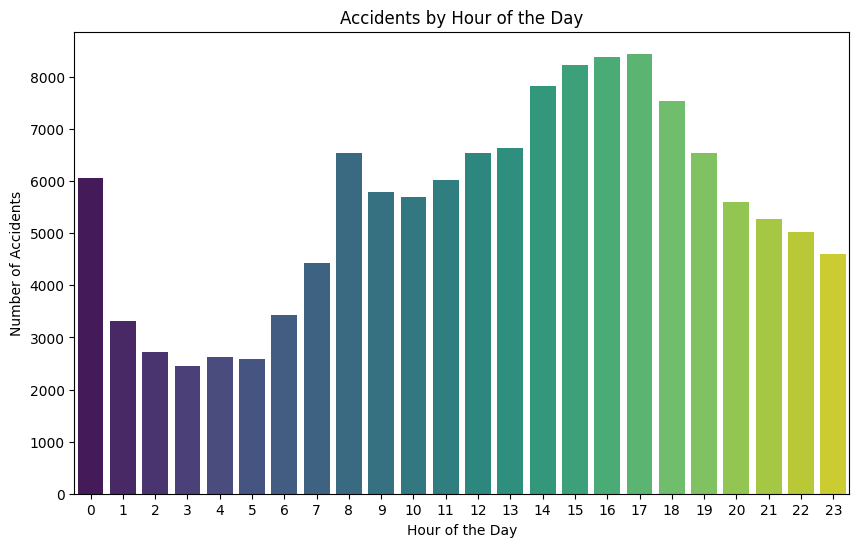

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot accidents by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='CRASH HOUR', data=data, palette='viridis')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()
